In [1]:
# Imports for email topology analyis
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Use NetworkX to read the raw dataset (edgelist) and form a graph.
raw_dataset_file = open('email.edgelist.txt', 'rb')
emails = nx.read_edgelist(raw_dataset_file);

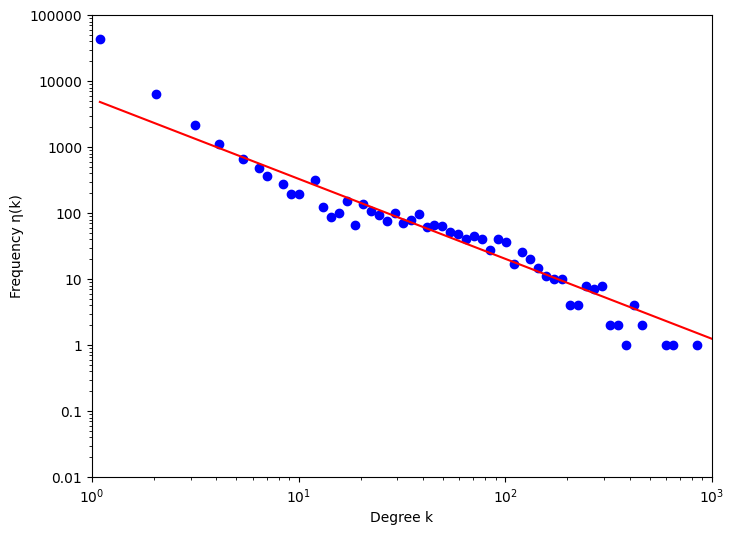

In [17]:
# PLOT 1: Plot the degree distribution of the email network.

# Set the figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the degree frequency using nx.degree_histogram.
# Create a dictonary of all node degrees.
degrees = dict(emails.degree())
# Grab the minimum and maximum degree from the network.
min_degree = min(degrees.values())
max_degree = max(degrees.values())
# Create logged bins using numpy--we'll create 100 bins for this graph.
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=100)
# Create histogram using the list of all node degrees and the logged 
# bins we just created.
hist, bin_edges = np.histogram(list(degrees.values()), bins=bins)

# Filter out zero values before performing the logarithmic transformation.
# This removes any bins that contain no value, so that when we go to 
# calculate the best line fit, we don't get a division-by-zero runtime error.
non_zero_mask = hist != 0
log_bin_edges = np.log10(bin_edges[1:][non_zero_mask])
log_hist = np.log10(hist[non_zero_mask])

# Plot the double log graph of degree frequencies.
ax.loglog(bin_edges[1:], hist, 'bo') 

# Fit a line to the data using numpy.polyfit.
# Use a degree of 1 for a linear fit.
slope, intercept = np.polyfit(log_bin_edges, log_hist, 1)
# Create the best-fit line using the slope and intercept.
best_fit_line = lambda x: 10**(intercept) * x**slope
# Plot the best-fit line.
ax.loglog(bin_edges[1:], best_fit_line(bin_edges[1:]), 'r-')

# Set the x-axis and y-axis tick formatters to display full labels.
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))

# Add graph formatting.
plt.xlim(1,1000)
plt.ylim(0.01,100000)
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], ['0.01', '0.1', '1', '10', '100', '1000', '10000', '100000'])
plt.xlabel('Degree k')
plt.ylabel('Frequency η(k)')

# Show graph.
plt.show()

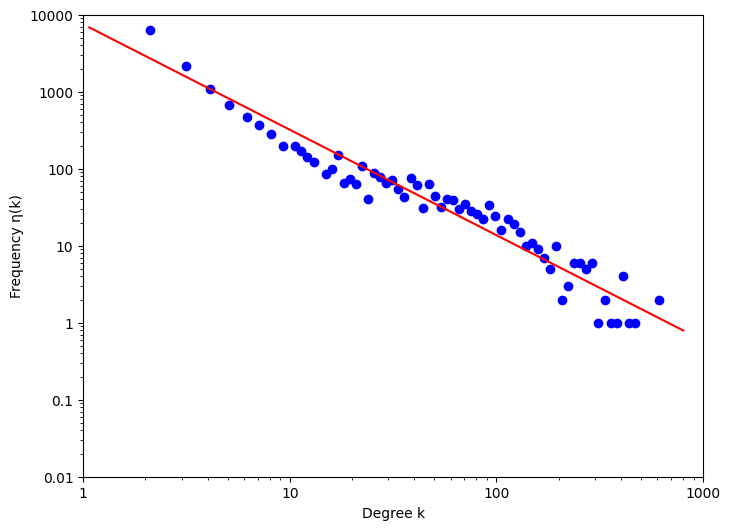

In [15]:
# PLOT 2: Plot the degree distribution of *just student nodes* in the email network.
# Note: just student nodes aren't given. We can extrapolate something approximating this
# using a limit on the degree nodes we consider (real students have a lower degree),
# for this we will use degrees in range .01-1000. 

# Set the figure and axis for the plot.
fig, ax = plt.subplots(figsize=(8, 6))

# Calculate the degree frequency using nx.degree_histogram.

# Create a dictonary of all node degrees within our acceptable range.
degrees = dict([(x, y) for (x, y) in emails.degree() if y <= 1000])

# Grab the minimum and maximum degree from the network.
min_degree = min(degrees.values())
max_degree = max(degrees.values())
# Create logged bins using numpy--we'll create 100 bins for this graph.
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=100)
# Create histogram using the list of all node degrees and the logged 
# bins we just created.
hist, bin_edges = np.histogram(list(degrees.values()), bins=bins)

# Filter out zero values before performing the logarithmic transformation.
# This removes any bins that contain no value, so that when we go to 
# calculate the best line fit, we don't get a division-by-zero runtime error.
non_zero_mask = hist != 0
log_bin_edges = np.log10(bin_edges[1:][non_zero_mask])
log_hist = np.log10(hist[non_zero_mask])

# Plot the double log graph of degree frequencies.
ax.loglog(bin_edges[1:], hist, 'bo') 

# Fit a line to the data using numpy.polyfit.
# Use a degree of 1 for a linear fit.
slope, intercept = np.polyfit(log_bin_edges, log_hist, 1)
# Create the best-fit line using the slope and intercept.
best_fit_line = lambda x: 10**(intercept) * x**slope
# Plot the best-fit line.
ax.loglog(bin_edges[1:], best_fit_line(bin_edges[1:]), 'r-')

# Set the x-axis and y-axis tick formatters to display full labels.
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=False, useOffset=False))

# Add graph formatting.
plt.xlim(1,1000)
plt.ylim(0.01,10000)
plt.yticks([0.01, 0.1, 1, 10, 100, 1000, 10000], ['0.01', '0.1', '1', '10', '100', '1000', '10000'])
plt.xlabel('Degree k')
plt.ylabel('Frequency η(k)')

# Show graph.
plt.show()